In [1]:
%load_ext autoreload

%autoreload 2

In [17]:
from __future__ import division
from glob import glob
import os
import time
import cPickle as pickle

import scipy.linalg
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rc("figure", dpi=144)

import astropy.io.fits
import astropy.table
import astropy.units as u
import astropy.constants as c
import astropy.time

import emcee
import numdifftools

import kepler
import threebody

In [18]:
toa_info = threebody.read_t2_toas("onescintle_mueller.tim")
len(toa_info)

78219

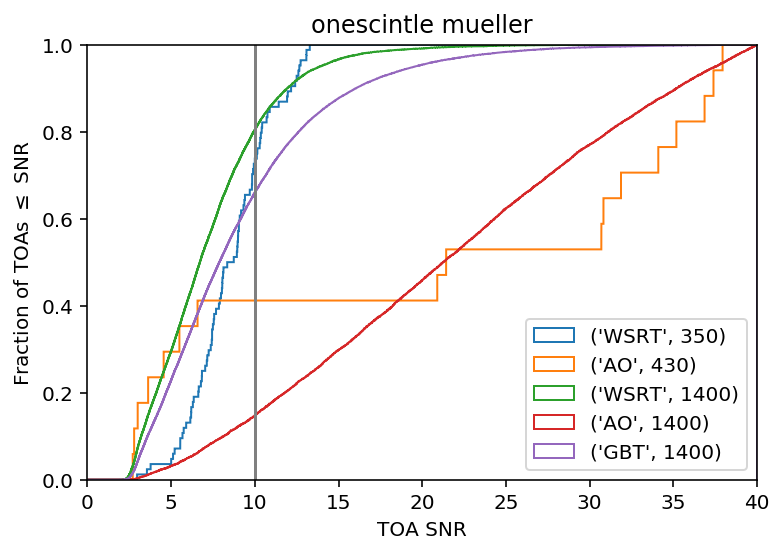

In [39]:
by_tel = {}
for t in toa_info:
    k = t["flags"]["tel"], int(t["flags"]["band"])
    if k not in by_tel:
        by_tel[k] = []
    by_tel[k].append(t)
range = (0,40)
for k in by_tel:
    plt.hist([np.sqrt(float(t["flags"]["nbin"]))*float(t["flags"]["snr"]) for t in by_tel[k]], 
             bins=10000, range=range, label=str(k), cumulative=1, normed=True, histtype='step')
plt.legend(loc='lower right')
plt.ylim(0,1)
plt.xlim(range[0],range[1])
plt.xlabel("TOA SNR")
plt.ylabel("Fraction of TOAs $\leq$ SNR")
plt.axvline(10,color="gray")
plt.title("%s %s" % (toa_info[0]["flags"]["processing_name"],toa_info[0]["flags"]["toa_name"]))
plt.savefig("snr-fractions.pdf")

In [20]:
toa_info[0]

{'file': 'data/obs/55956.63_WSRT_1400/onescintle/scrunch_0000.ar',
 'flags': {'P': '0.00273289117052',
  'band': '1400',
  'bw': '5.0',
  'chan': '0',
  'max_smearing': '0.0369982444476',
  'nbin': '512',
  'phase': '-0.234572279593',
  'processing_name': 'onescintle',
  'reduced_chi2': '0.972311607627',
  'snr': '0.127812757608',
  'subint': '0',
  'tel': 'WSRT',
  'toa_name': 'mueller',
  'tsubint': '589.996224',
  'uncert': '0.00248540565308',
  'uncert_scaled': '0.00245075567541',
  'weighted_frequency': '1380.00004345'},
 'freq': 1302.5,
 'mjd': 55956.633159781646,
 'mjd_string': '55956.63315978164554953533',
 'tel': 'wsrt',
 'uncert': 6.79234316447}